In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime
import geopandas as gpd
import plotly.express as px
from collections import Counter
#import contextily as cx
import folium 
from folium import plugins

In [2]:
# what to include in the blog post:
# Which borough has most accidents [done]
# top 5 common zip code accidents [done]
# Which time has the most accidents [done]
# most common car involved in accidents[done]
# Which month and year has the most accidents[done] 

In [3]:
df = pd.read_csv('Motor_Vehicle_Collisions_Crashes.csv', sep=',')
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,4/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
1,4/13/2021,21:35,BROOKLYN,11217.0,40.683580,-73.976170,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
2,4/15/2021,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,4/13/2021,16:00,BROOKLYN,11222.0,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,...,Unspecified,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN
4,4/12/2021,8:25,NaN,NaN,0.000000,0.000000,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,7/10/2016,19:30,MANHATTAN,10003.0,40.724050,-73.988210,"(40.72405, -73.98821)",NaN,NaN,86 EAST 2 STREET,...,Unspecified,NaN,NaN,NaN,3478154,4 dr sedan,4 dr sedan,NaN,NaN,NaN
1048571,7/4/2016,23:00,NaN,NaN,40.575336,-73.996445,"(40.575336, -73.996445)",MERMAID AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3479131,4 dr sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1048572,7/19/2016,6:58,QUEENS,11106.0,40.765224,-73.931700,"(40.765224, -73.9317)",21 STREET,BROADWAY,NaN,...,Unspecified,NaN,NaN,NaN,3483454,4 dr sedan,4 dr sedan,NaN,NaN,NaN
1048573,7/8/2016,15:35,BRONX,10454.0,40.809320,-73.922370,"(40.80932, -73.92237)",NaN,NaN,250 WILLIS AVENUE,...,Unspecified,NaN,NaN,NaN,3476966,4 dr sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [4]:
Validlocations = df[["BOROUGH","ZIP CODE","LATITUDE","LONGITUDE","CRASH DATE","CRASH TIME","LOCATION","VEHICLE TYPE CODE 1"]].dropna()
#Validlocations['CRASH DATE'] = pd.to_datetime(Validlocations['CRASH DATE'])
Validlocations['CRASH DATE'] = pd.to_datetime(Validlocations['CRASH DATE'])

In [5]:
Validlocations

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,CRASH DATE,CRASH TIME,LOCATION,VEHICLE TYPE CODE 1
1,BROOKLYN,11217.0,40.683580,-73.976170,2021-04-13,21:35,"(40.68358, -73.97617)",Sedan
13,BROOKLYN,11201.0,40.697540,-73.983120,2019-05-21,22:50,"(40.69754, -73.98312)",ï¿½MBU
15,BRONX,10461.0,40.843464,-73.836000,2021-02-26,14:50,"(40.843464, -73.836)",Station Wagon/Sport Utility Vehicle
17,BROOKLYN,11234.0,40.626457,-73.918000,2021-03-31,22:20,"(40.626457, -73.918)",Sedan
18,STATEN ISLAND,10312.0,40.526894,-74.167280,2021-04-06,22:58,"(40.526894, -74.16728)",Station Wagon/Sport Utility Vehicle
...,...,...,...,...,...,...,...,...
1048565,MANHATTAN,10024.0,40.783844,-73.979996,2016-07-01,11:30,"(40.783844, -73.979996)",4 dr sedan
1048566,MANHATTAN,10119.0,40.760525,-73.979980,2016-07-05,8:40,"(40.760525, -73.97998)",Station Wagon/Sport Utility Vehicle
1048570,MANHATTAN,10003.0,40.724050,-73.988210,2016-07-10,19:30,"(40.72405, -73.98821)",4 dr sedan
1048572,QUEENS,11106.0,40.765224,-73.931700,2016-07-19,6:58,"(40.765224, -73.9317)",4 dr sedan


In [7]:
# Which borough has most accidents
Validlocations['BOROUGH'].value_counts()

BROOKLYN         210625
QUEENS           180251
MANHATTAN        126070
BRONX            103743
STATEN ISLAND     24187
Name: BOROUGH, dtype: int64

Text(0.5, 0.98, 'Total number of accidents in NYC (2016-2022)')

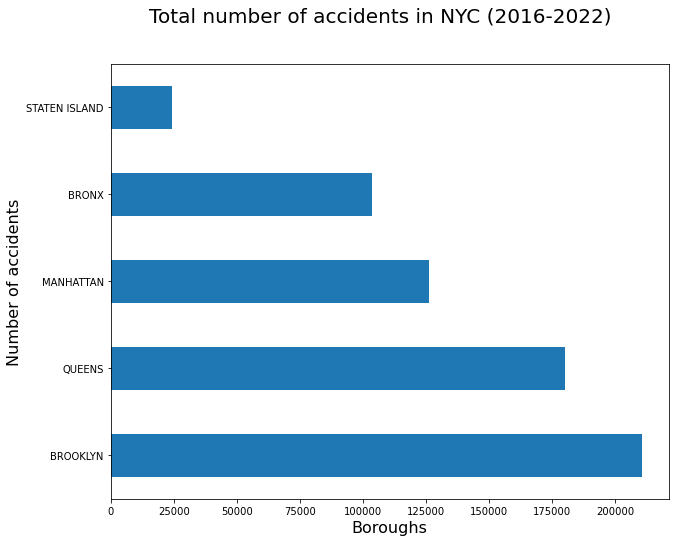

In [8]:
Validlocations['BOROUGH'].value_counts().plot(kind='barh',figsize=(10,8));
plt.xlabel("Boroughs", fontsize=16)
plt.ylabel("Number of accidents", fontsize= 16)
plt.suptitle("Total number of accidents in NYC (2016-2022)",fontsize=20)

In [9]:
# top ten accidents in each borugh and entire city by street
# Example the most common streets to have an accident in brooklyn is [street name] 
Validlocations['ZIP CODE'] = Validlocations['ZIP CODE'].astype(int)
#Validlocations['ZIP CODE'].value_counts().head(20).to_frame()

Text(0.5, 0.98, 'Top 10 Zip codes with the most accidents ( 2016 - 2022)')

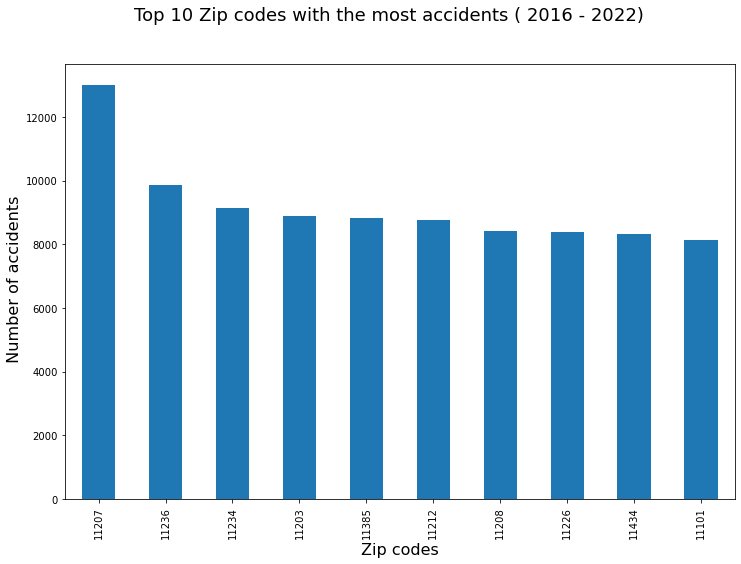

In [10]:
Validlocations['ZIP CODE'].value_counts().head(10).plot(kind='bar',figsize=(12,8))
plt.xlabel("Zip codes",fontsize = 16)
plt.ylabel(" Number of accidents" ,fontsize = 16)
plt.suptitle("Top 10 Zip codes with the most accidents ( 2016 - 2022)", fontsize = 18)

Text(0.5, 0.98, 'Most occurance of accidents based on time')

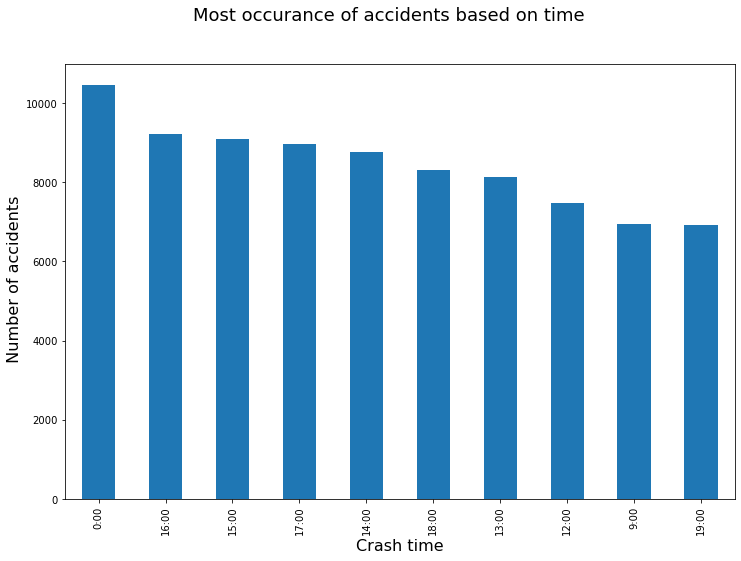

In [11]:
#Which time has the most accidents
Validlocations['CRASH TIME'].value_counts().head(10).plot(kind='bar',figsize=(12,8))
plt.xlabel("Crash time",fontsize = 16)
plt.ylabel(" Number of accidents" ,fontsize = 16)
plt.suptitle("Most occurance of accidents based on time", fontsize = 18)

Text(0.5, 0.98, 'Car type used in most accidents')

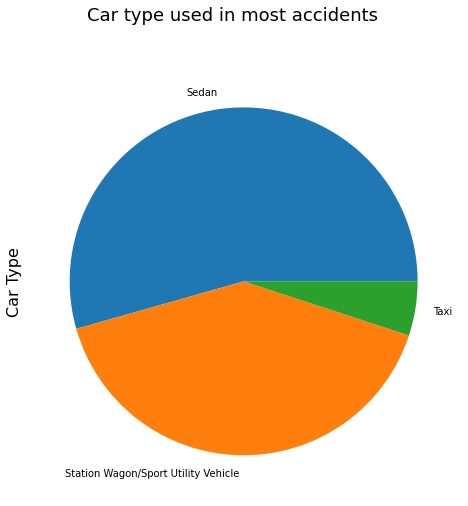

In [13]:
Validlocations['VEHICLE TYPE CODE 1'].value_counts().head(3).plot(kind='pie',figsize=(12,8))
plt.ylabel("Car Type" ,fontsize = 16)
plt.suptitle("Car type used in most accidents", fontsize = 18)

Text(0.5, 0.98, 'Most occurance of accidents based on time')

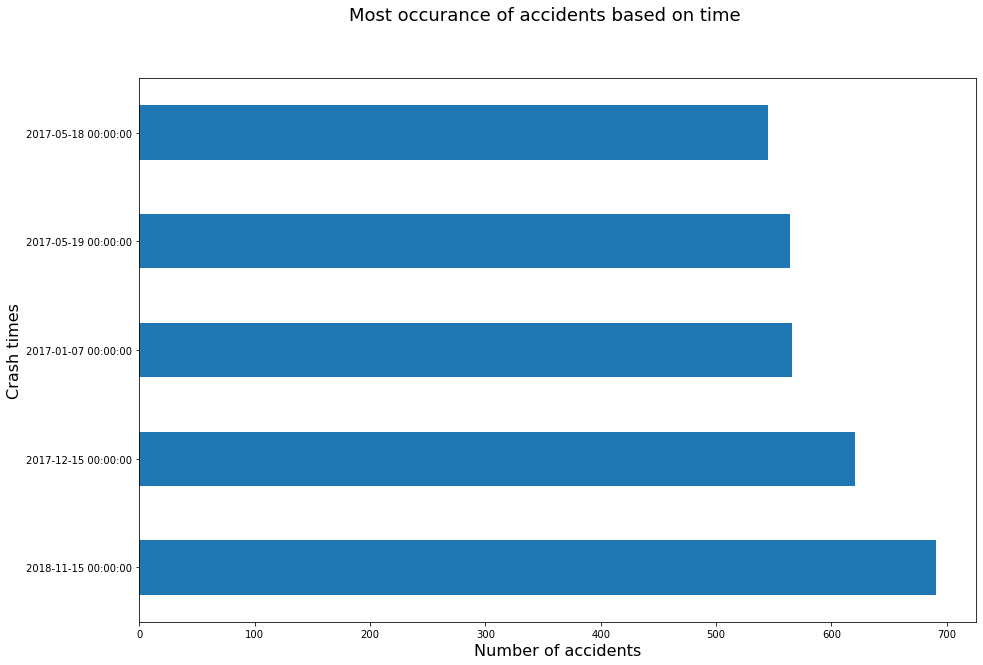

In [16]:
Validlocations['CRASH DATE'].value_counts().head().plot(kind='barh',figsize=(15,10))
plt.xlabel("Number of accidents",fontsize = 16)
plt.ylabel("Crash times" ,fontsize = 16)
plt.suptitle("Most occurance of accidents based on time", fontsize = 18)

In [17]:
# Which month has the most accidents
Validlocations['Month'] = Validlocations['CRASH DATE'].dt.month_name()
Validlocations['Year'] = Validlocations['CRASH DATE'].dt.year


Text(0.5, 0.98, 'Month with the most accidents')

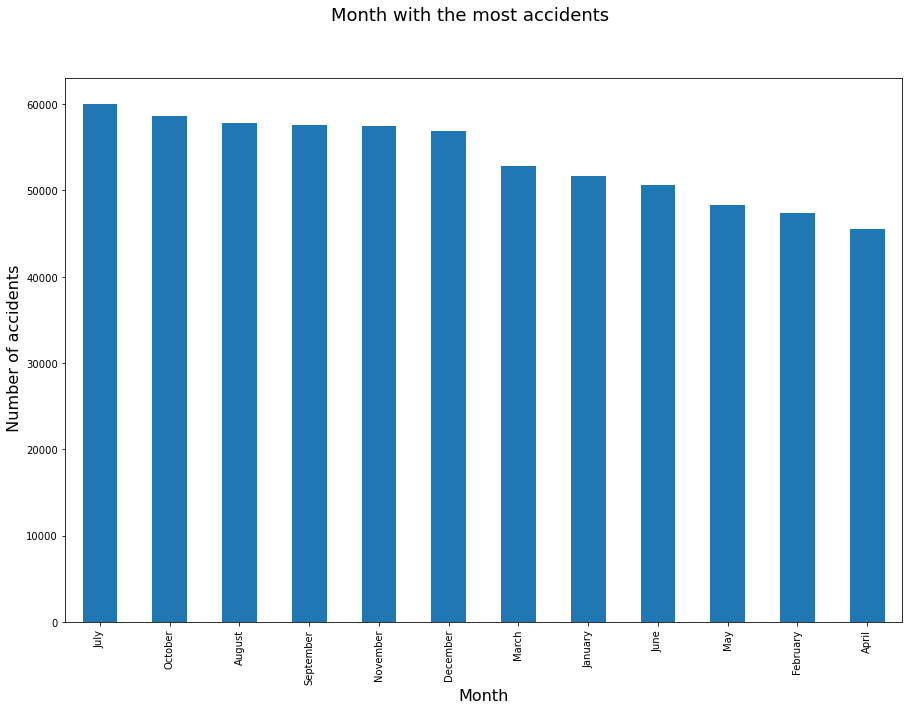

In [18]:
Validlocations['Month'].value_counts().plot(kind='bar',figsize=(15,10))
plt.xlabel("Month",fontsize = 16)
plt.ylabel(" Number of accidents" ,fontsize = 16)
plt.suptitle("Month with the most accidents", fontsize = 18)

Text(0.5, 0.98, 'Year with the most accidents')

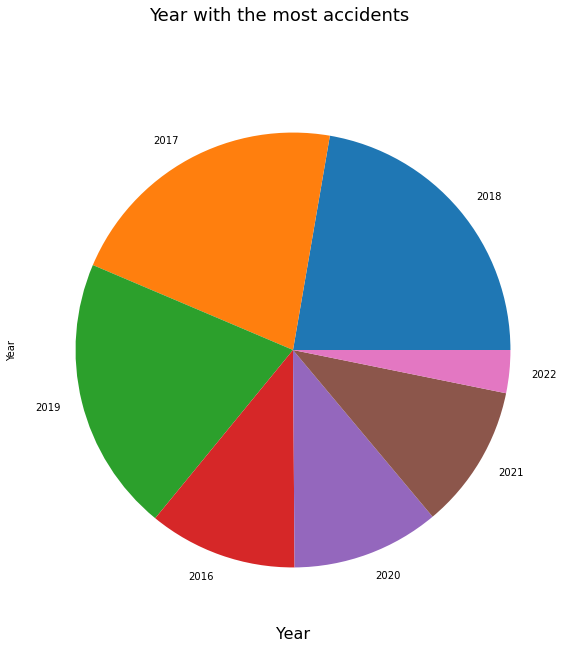

In [25]:
Validlocations['Year'].value_counts().head(7).plot(kind='pie',figsize=(15,10))
plt.xlabel("Year",fontsize = 16)
plt.suptitle("Year with the most accidents", fontsize = 18)

Text(0.5, 0.98, 'Year with the most accidents')

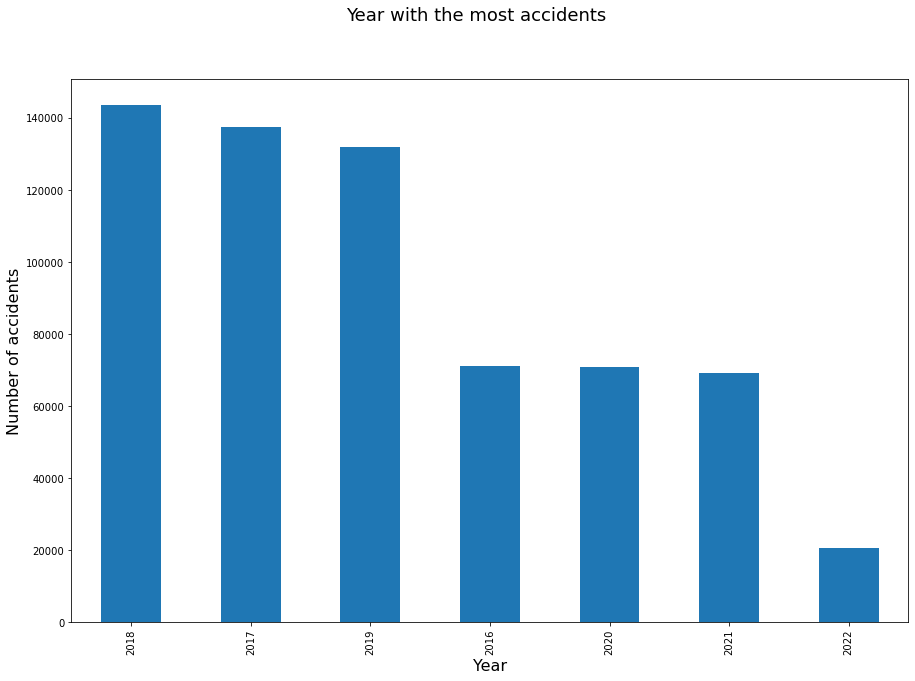

In [24]:
Validlocations['Year'].value_counts().head(7).plot(kind='bar',figsize=(15,10))
plt.xlabel("Year",fontsize = 16)
plt.ylabel("Number of accidents" ,fontsize = 16)
plt.suptitle("Year with the most accidents", fontsize = 18)

In [13]:
Validlocations['latitude'] = Validlocations['LATITUDE']>0
Validlocations['longitude'] = Validlocations['LONGITUDE']<0
Validlocations

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,CRASH DATE,CRASH TIME,LOCATION,VEHICLE TYPE CODE 1,Month,Year,latitude,longitude
1,BROOKLYN,11217,40.683580,-73.976170,2021-04-13,21:35,"(40.68358, -73.97617)",Sedan,April,2021,True,True
13,BROOKLYN,11201,40.697540,-73.983120,2019-05-21,22:50,"(40.69754, -73.98312)",ï¿½MBU,May,2019,True,True
15,BRONX,10461,40.843464,-73.836000,2021-02-26,14:50,"(40.843464, -73.836)",Station Wagon/Sport Utility Vehicle,February,2021,True,True
17,BROOKLYN,11234,40.626457,-73.918000,2021-03-31,22:20,"(40.626457, -73.918)",Sedan,March,2021,True,True
18,STATEN ISLAND,10312,40.526894,-74.167280,2021-04-06,22:58,"(40.526894, -74.16728)",Station Wagon/Sport Utility Vehicle,April,2021,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1048565,MANHATTAN,10024,40.783844,-73.979996,2016-07-01,11:30,"(40.783844, -73.979996)",4 dr sedan,July,2016,True,True
1048566,MANHATTAN,10119,40.760525,-73.979980,2016-07-05,8:40,"(40.760525, -73.97998)",Station Wagon/Sport Utility Vehicle,July,2016,True,True
1048570,MANHATTAN,10003,40.724050,-73.988210,2016-07-10,19:30,"(40.72405, -73.98821)",4 dr sedan,July,2016,True,True
1048572,QUEENS,11106,40.765224,-73.931700,2016-07-19,6:58,"(40.765224, -73.9317)",4 dr sedan,July,2016,True,True


In [22]:
Validlocations.drop(Validlocations[Validlocations['longitude'] == False].index, inplace=True)
Validlocations.drop(Validlocations[Validlocations['latitude'] == False].index, inplace=True)
Validlocations[['LATITUDE','LONGITUDE']].value_counts().head(10)

LATITUDE   LONGITUDE 
40.696033  -73.984530    494
40.861862  -73.912820    457
40.820305  -73.890830    403
40.816864  -73.882744    367
40.733536  -73.870350    342
40.758980  -73.995950    335
40.675735  -73.896860    323
40.759514  -73.999260    314
40.656160  -73.767360    308
40.760600  -73.964340    299
dtype: int64

In [20]:
locationplot = Validlocations[['LONGITUDE','LATITUDE']]
#locationplot_list = locationplot.values.tolist() 
#locationplot_list_size = len(locationplot_list)
#locationplot_list_size
#locationplot_list

In [21]:
#plotting nyc map
map = folium.Map(location = [40.7128,-73.7949], tiles='OpenStreetMap' , zoom_start = 11)
map

In [31]:
folium.Marker(['40.696033','-73.984530'],popup='No.1: Borough: Brooklyn').add_to(map)
folium.Marker(['40.861862','-73.912820'],popup='No.2: Borough: Bronx').add_to(map)
folium.Marker(['40.820305','-73.890830'],popup='No.3: Borough: Bronx').add_to(map)
folium.Marker(['40.816864','-73.882744'],popup='No.4: Borough: Bronx').add_to(map)
folium.Marker(['40.733536','-73.870350'],popup='No.5: Borough: Queens').add_to(map)
folium.Marker(['40.758980','-73.995950'],popup='No.6: Borough: Manhattan').add_to(map)
folium.Marker(['40.675735','-73.896860'],popup='No.7: Borough: Brooklyn').add_to(map)
folium.Marker(['40.759514','-73.999260'],popup='No.8: Borough: Manhattan').add_to(map)
folium.Marker(['40.656160','-73.767360 '],popup='No.9: Borough: Queens').add_to(map)
folium.Marker(['40.760600','-73.964340'],popup='No10: Borough: Manhattan').add_to(map)
map